### Text Classification with BOW

#### Import libraries

In [1]:
# Load for Jupyter Notebook
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')

In [2]:
import pandas as pd 
import numpy as np 
from src.utils import io
from src.fake_news_detector.core.classification.bow import models as bm
from sklearn.model_selection import train_test_split

#### Import dataset

In [3]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_content.json')
df = pd.DataFrame(data=articles['articles']) # Put in pandas dataframe

#### Create dataset

In [4]:
# Pass to array
title_sub = []
for line in df['title_subject'].values:
    title_sub.append(' '.join(line))
print(title_sub)

['they', 'switzerland', 'navarre', 'a woman', '', '', 'the government', 'madrid', 'podemos', 'pedro Sánchez also plug his brother into the Diputación of Badajoz', 'Colau offer employment contract to all the Aquarius immigrants', 'the terrorist', 'transsexuals', 'feminists', 'carmena', 'iSIS launch animal jihad Islamists', 'the Bases of We', 'muslims', 'an Afghan immigrant', 'the new Minister of Health', 'chaos', '', 'muslims', 'the Merkel government', 'a random security check', 'madrid City Council', 'amnesty International', 'carmen Calvo call for the teat cheese to disappear as sexist', 'they', 'catalan firefighters', 'five risk', 'the viral photo', 'politics between the shit', 'the magistrate', 'airlines', 'worst economy minister on the Financial Times list', 'donald Trump White House', 'lies in a book', 'a short gun to a local policeman', 'a feminist abort her baby for be a child I could bring that monster to the world', 'he', '', 'September the mouthpieces of the breathalyzers will

In [5]:
corpus = pd.DataFrame()
corpus['corpus'] = title_sub
corpus['label'] = df['fake']*1
len(df)
corpus['id'] = list(range(0,len(df)))
corpus.head()

,corpus,label,id
0,they,1,0
1,switzerland,1,1
2,navarre,1,2
3,a woman,1,3
4,,1,4


#### Create models

In [6]:
train_data, test_data = train_test_split(corpus, random_state=0)

In [7]:
models = bm.BOWModels(train_data, test_data, 'corpus', 'label')

In [8]:
models.build_models()

In [9]:
res = models.train_with_classificators(['LR', 'DTC','KNC'], True)

MODEL VECTORIZER 0:
Model Classificator LR  Score: 0.9333333333333333
Model Classificator DTC  Score: 0.9333333333333333
Model Classificator KNC  Score: 0.52
MODEL VECTORIZER 1:
Model Classificator LR  Score: 0.8
Model Classificator DTC  Score: 0.8
Model Classificator KNC  Score: 0.5466666666666666
MODEL VECTORIZER 2:
Model Classificator LR  Score: 0.68
Model Classificator DTC  Score: 0.7066666666666667
Model Classificator KNC  Score: 0.6533333333333333


/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MODEL  0 :
Classificator:  LR
Accuracy:  0.6923076923076923
Confusion matrix:  [[ 1  8]
 [ 0 17]]
(row=expected, col=predicted)
Classificator:  DTC
Accuracy:  0.6538461538461539
Confusion matrix:  [[ 1  8]
 [ 1 16]]
(row=expected, col=predicted)
Classificator:  KNC
Accuracy:  0.6538461538461539
Confusion matrix:  [[ 0  9]
 [ 0 17]]
(row=expected, col=predicted)
MODEL  1 :
Classificator:  LR
Accuracy:  0.6923076923076923
Confusion matrix:  [[ 1  8]
 [ 0 17]]
(row=expected, col=predicted)
Classificator:  DTC
Accuracy:  0.34615384615384615
Confusion matrix:  [[ 9  0]
 [17  0]]
(row=expected, col=predicted)
Classificator:  KNC
Accuracy:  0.6538461538461539
Confusion matrix:  [[ 0  9]
 [ 0 17]]
(row=expected, col=predicted)
MODEL  2 :
Classificator:  LR
Accuracy:  0.6153846153846154
Confusion matrix:  [[ 2  7]
 [ 3 14]]
(row=expected, col=predicted)
Classificator:  DTC
Accuracy:  0.5
Confusion matrix:  [[ 7  2]
 [11  6]]
(row=expected, col=predicted)
Classificator:  KNC
Accuracy:  0.4230769

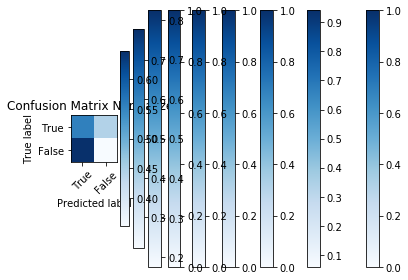

In [10]:
models.predict_all(True)